<a href="https://colab.research.google.com/github/rishabhr136/Clustering/blob/main/Amazon_Books_Analysis_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import  numpy as np
import pandas as pd
import seaborn as sns
import collections
from scipy.stats import shapiro

In [138]:
df = pd.read_csv("/content/drive/MyDrive/bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [139]:
df.shape

(550, 7)

In [140]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [141]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [142]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [143]:
df["Genre"] = df.Genre.astype("category")

In [144]:
df.duplicated(subset=["Name"]).sum()

199

In [145]:
df.duplicated(subset=["Author"]).sum()

302

In [146]:
df.duplicated().sum()

0

In [147]:
#with pd.option_context('display.max_rows', None):
display(df[df['Name'].duplicated() == True].sort_values(by=['Name']))

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction


In [148]:
authors = df["Author"].sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [149]:
authors = df['Author'].unique()
authors.size

248

In [150]:
count_books = collections.Counter(df["Name"].tolist())

In [151]:
count_books.most_common(50)

[('Publication Manual of the American Psychological Association, 6th Edition',
  10),
 ('StrengthsFinder 2.0', 9),
 ("Oh, the Places You'll Go!", 8),
 ('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change',
  7),
 ('The Very Hungry Caterpillar', 7),
 ('Jesus Calling: Enjoying Peace in His Presence (with Scripture References)',
  6),
 ('The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)',
  6),
 ('First 100 Words', 5),
 ("Giraffes Can't Dance", 5),
 ('How to Win Friends & Influence People', 5),
 ('Laugh-Out-Loud Jokes for Kids', 5),
 ('The 5 Love Languages: The Secret to Love That Lasts', 5),
 ('The 5 Love Languages: The Secret to Love that Lasts', 5),
 ('The Five Dysfunctions of a Team: A Leadership Fable', 5),
 ('The Official SAT Study Guide', 5),
 ('To Kill a Mockingbird', 5),
 ('Unbroken: A World War II Story of Survival, Resilience, and Redemption', 5),
 ('Wonder', 5),
 ('Dear Zoo: A Lift-the-Flap Book', 4),
 ("Good to Great: 

In [152]:
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [153]:
authors = df['Author'].unique()
authors.size

246

In [154]:
genre = df.Genre.unique()
genre

['Non Fiction', 'Fiction']
Categories (2, object): ['Non Fiction', 'Fiction']

In [155]:
years = df.Year.unique()
sorted(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [156]:
df[df["Name"].duplicated()==True]

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [157]:
data_without_year = df.drop(['Year'], axis = 1)
data_without_year

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction


In [158]:
data_without_year = data_without_year.drop_duplicates(keep="first")
data_without_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         361 non-null    object  
 1   Author       361 non-null    object  
 2   User Rating  361 non-null    float64 
 3   Reviews      361 non-null    int64   
 4   Price        361 non-null    int64   
 5   Genre        361 non-null    category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 17.4+ KB


In [159]:
count_books = collections.Counter(data_without_year["Name"].tolist())
count_books.most_common(10)

[('The Help', 3),
 ('Gone Girl', 2),
 ("Quiet: The Power of Introverts in a World That Can't Stop Talking", 2),
 ('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change',
  2),
 ('The Fault in Our Stars', 2),
 ('The Girl on the Train', 2),
 ('The Immortal Life of Henrietta Lacks', 2),
 ('To Kill a Mockingbird', 2),
 ('Unbroken: A World War II Story of Survival, Resilience, and Redemption', 2),
 ('10-Day Green Smoothie Cleanse', 1)]

In [160]:
data_without_year[data_without_year["Name"]=='The Help']

,Name,Author,User Rating,Reviews,Price,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,Fiction


In [161]:
data_without_year_dup = data_without_year.drop_duplicates(keep="first",subset="Name")
data_without_year_dup

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


In [162]:
top_authors = data_without_year_dup.groupby("Author")["User Rating"].mean()
top_authors = top_authors.sort_values(ascending=False)
top_authors

Author
Eric Carle            4.9
Patrick Thorpe        4.9
Lin-Manuel Miranda    4.9
Sarah Young           4.9
Jill Twiss            4.9
                     ... 
Ian K. Smith M.D.     4.1
Gallup                4.0
Gillian Flynn         4.0
Muriel Barbery        4.0
Donna Tartt           3.9
Name: User Rating, Length: 246, dtype: float64

In [163]:
count_authors = collections.Counter(data_without_year_dup.Author.tolist())

In [164]:
count_authors_freq =  count_authors.most_common(15)
count_authors_freq

[('Jeff Kinney', 12),
 ('Rick Riordan', 10),
 ('J.K. Rowling', 8),
 ('Stephenie Meyer', 7),
 ('Dav Pilkey', 6),
 ("Bill O'Reilly", 6),
 ('Suzanne Collins', 5),
 ('E L James', 5),
 ('John Grisham', 5),
 ('Stephen King', 4),
 ('Charlaine Harris', 4),
 ('Stieg Larsson', 4),
 ('George R.R. Martin', 3),
 ('Veronica Roth', 3),
 ('Glenn Beck', 3)]

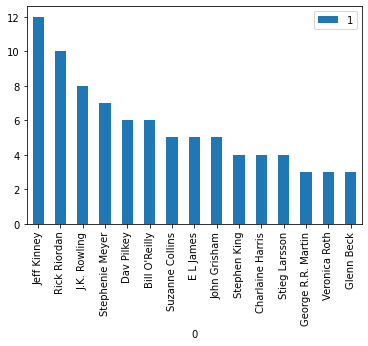

In [165]:
count_authors_freq = pd.DataFrame(count_authors_freq)
count_authors_freq.plot.bar(x=0,y=1)

In [166]:
book_reviews = data_without_year_dup.groupby("Name")["Reviews"].mean()
book_reviews = book_reviews.sort_values(ascending=False)
top_book_reviews = book_reviews.head(15)
top_book_reviews

Name
Where the Crawdads Sing                                                                     87841
The Girl on the Train                                                                       79446
Becoming                                                                                    61133
Gone Girl                                                                                   57271
The Fault in Our Stars                                                                      50482
The Nightingale: A Novel                                                                    49288
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    47265
The Martian                                                                                 39459
All the Light We Cannot See                                                                 36348
The Alchemist                                                                               35799
The Goldfinch: 

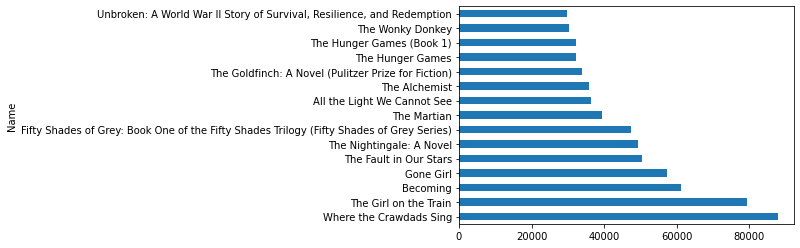

In [167]:
top_book_reviews.plot.barh()

In [168]:
genres = data_without_year_dup.groupby("Genre")["Name"].count()
genres =  genres.sort_values(ascending=False)
genres

Genre
Non Fiction    191
Fiction        160
Name: Name, dtype: int64

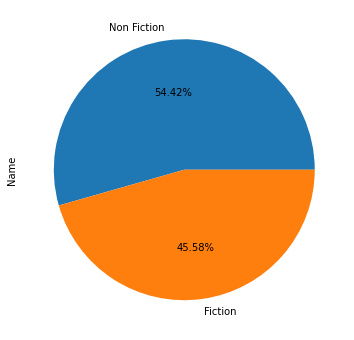

In [169]:
genres.plot.pie(autopct="%0.2f%%",figsize=(6,6))

In [170]:
data_without_year_dup.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,351.0,4.608832,0.226669,3.3,4.5,4.6,4.8,4.9
Reviews,351.0,9799.683761,10871.356548,37.0,3442.5,6346.0,11470.5,87841.0
Price,351.0,13.076923,10.050860,0.0,8.0,12.0,16.0,105.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


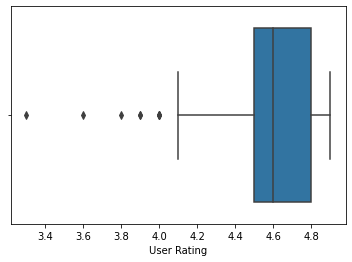

In [171]:
sns.boxplot(data_without_year_dup["User Rating"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


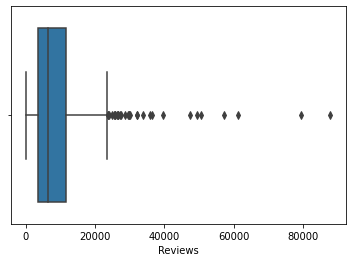

In [172]:
sns.boxplot(data_without_year_dup["Reviews"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


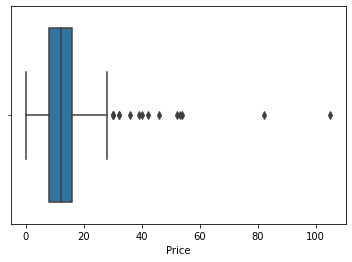

In [173]:
sns.boxplot(data_without_year_dup["Price"])

In [174]:
data_without_year_dup.corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.055595,-0.034787
Reviews,-0.055595,1.000000,-0.021519
Price,-0.034787,-0.021519,1.000000


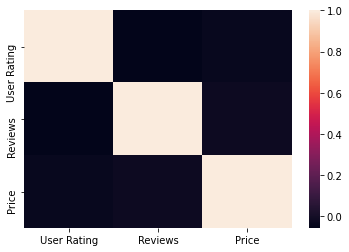

In [175]:
sns.heatmap(data_without_year_dup.corr())

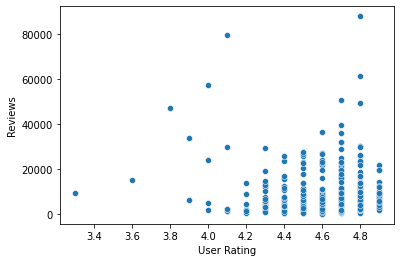

In [176]:
sns.scatterplot(x=data_without_year_dup['User Rating'], y=data_without_year_dup['Reviews'])

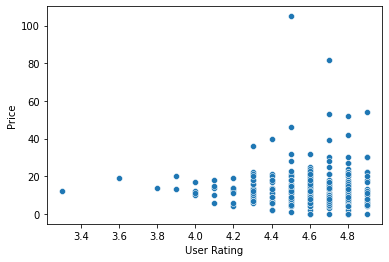

In [177]:
sns.scatterplot(x=data_without_year_dup['User Rating'], y=data_without_year_dup['Price'])

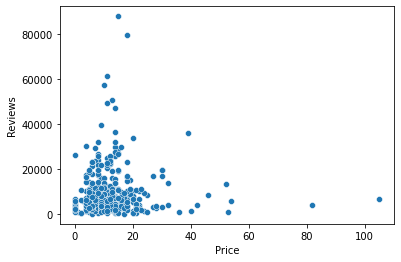

In [178]:
sns.scatterplot(x=data_without_year_dup['Price'], y=data_without_year_dup['Reviews'])

In [179]:
alpha = 0.05
stat, p_val = shapiro(data_without_year_dup["User Rating"])

In [180]:
p_val

4.265339755621844e-16

In [181]:
if p_val>alpha:
  print("Ho-Null-Hypothesis is accepted and the data is distributed Normally")
elif p_val<alpha:
  print("H1-Alt-Hypothesis is accepted and the data is not distributed Normally")

H1-Alt-Hypothesis is accepted and the data is not distributed Normally


In [182]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [183]:
data_for_cluster = data_without_year_dup.drop(columns=['Name','Author'])

In [184]:
data_for_cluster.head(2)

,User Rating,Reviews,Price,Genre
0,4.7,17350,8,Non Fiction
1,4.6,2052,22,Fiction


In [185]:
data_for_cluster.Genre = data_for_cluster.Genre.astype("object")
data_for_cluster.dtypes

User Rating    float64
Reviews          int64
Price            int64
Genre           object
dtype: object

In [186]:
data_for_cluster['Genre'].replace(['Fiction','Non Fiction'],[0,1],inplace=True)
data_for_cluster.head()        

,User Rating,Reviews,Price,Genre
0,4.7,17350,8,1
1,4.6,2052,22,0
2,4.7,18979,15,1
3,4.7,21424,6,0
4,4.8,7665,12,1


In [191]:
X = data_for_cluster.values
X

array([[4.7000e+00, 1.7350e+04, 8.0000e+00, 1.0000e+00],
       [4.6000e+00, 2.0520e+03, 2.2000e+01, 0.0000e+00],
       [4.7000e+00, 1.8979e+04, 1.5000e+01, 1.0000e+00],
       ...,
       [4.8000e+00, 2.1625e+04, 9.0000e+00, 0.0000e+00],
       [4.9000e+00, 9.4130e+03, 8.0000e+00, 0.0000e+00],
       [4.7000e+00, 1.4331e+04, 8.0000e+00, 1.0000e+00]])

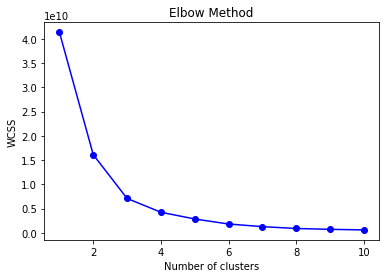

In [193]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [194]:
#choosing number of clusters as 3
kmeans = KMeans(n_clusters=3,init = 'k-means++', random_state = 100)
y = kmeans.fit_predict(X)

In [195]:
kmeans.cluster_centers_

array([[4.42857143e+00, 6.18180000e+04, 1.31428571e+01, 1.42857143e-01],
       [4.61352313e+00, 5.62080071e+03, 1.32633452e+01, 6.01423488e-01],
       [4.60793651e+00, 2.26590159e+04, 1.22380952e+01, 3.33333333e-01]])

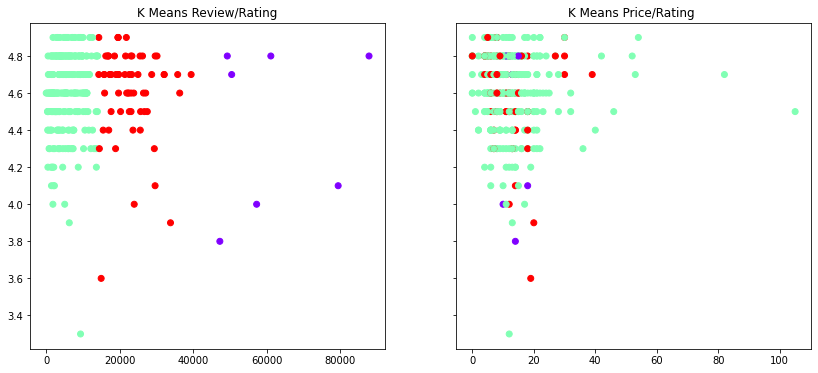

In [196]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))

ax1.set_title('K Means Review/Rating')
ax1.scatter(data_for_cluster['Reviews'],data_for_cluster['User Rating'],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("K Means Price/Rating ")
ax2.scatter(data_for_cluster['Price'],data_for_cluster['User Rating'],c=kmeans.labels_,cmap ='rainbow')